<a href="https://colab.research.google.com/github/azamor18/azamor18/blob/main/inventario%20correlaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('assignment01 for GitJobish03 and edited in git, and 18')

assignment01 for GitJobish03 and edited in git, and 18


In [1]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression

In [3]:
inventario = '/content/datos inventario e indicadores.xlsx'
df = pd.read_excel(inventario)
df

,Fecha,RTY Interno,FTC,FTT,Inventario
0,2022-11-01,41.95,8960.0,71.55,77
1,2022-11-02,31.59,9238.0,62.03,74
2,2022-11-03,28.84,10614.0,59.25,101
3,2022-11-04,23.30,14846.0,61.93,72
4,2022-11-05,36.61,NaN,66.12,71
5,2022-11-06,19.64,NaN,45.83,120
6,2022-11-07,27.46,10873.0,58.78,146
7,2022-11-08,37.06,11497.0,83.87,101
8,2022-11-09,22.73,10926.0,70.57,109
9,2022-11-10,38.02,11934.0,77.13,124


In [6]:
FTC =df['FTC'].astype('float').median(axis=0)
df["FTC"].replace(np.nan, FTC, inplace=True)
df.head()

,Fecha,RTY Interno,FTC,FTT,Inventario
0,2022-11-01,41.95,8960.0,71.55,77
1,2022-11-02,31.59,9238.0,62.03,74
2,2022-11-03,28.84,10614.0,59.25,101
3,2022-11-04,23.30,14846.0,61.93,72
4,2022-11-05,36.61,11497.0,66.12,71


In [17]:
df.corr()

,RTY Interno,FTC,FTT,Inventario
RTY Interno,1.000000,0.093881,0.852828,0.393217
FTC,0.093881,1.000000,0.120187,0.343093
FTT,0.852828,0.120187,1.000000,0.333945
Inventario,0.393217,0.343093,0.333945,1.000000


In [11]:
df['RTY Interno'] = df['RTY Interno']/df['RTY Interno'].max()
df.head()

,Fecha,RTY Interno,FTC,FTT,Inventario
0,2022-11-01,0.723900,8960.0,71.55,77
1,2022-11-02,0.545125,9238.0,62.03,74
2,2022-11-03,0.497670,10614.0,59.25,101
3,2022-11-04,0.402071,14846.0,61.93,72
4,2022-11-05,0.631752,11497.0,66.12,71


In [12]:
df['FTC'] = df['FTC']/df['FTC'].max()
df.head()

,Fecha,RTY Interno,FTC,FTT,Inventario
0,2022-11-01,0.723900,0.457610,71.55,77
1,2022-11-02,0.545125,0.471808,62.03,74
2,2022-11-03,0.497670,0.542084,59.25,101
3,2022-11-04,0.402071,0.758223,61.93,72
4,2022-11-05,0.631752,0.587181,66.12,71


In [13]:
df['FTT'] = df['FTT']/df['FTT'].max()
df.head()

,Fecha,RTY Interno,FTC,FTT,Inventario
0,2022-11-01,0.723900,0.457610,0.776115,77
1,2022-11-02,0.545125,0.471808,0.672850,74
2,2022-11-03,0.497670,0.542084,0.642694,101
3,2022-11-04,0.402071,0.758223,0.671765,72
4,2022-11-05,0.631752,0.587181,0.717214,71


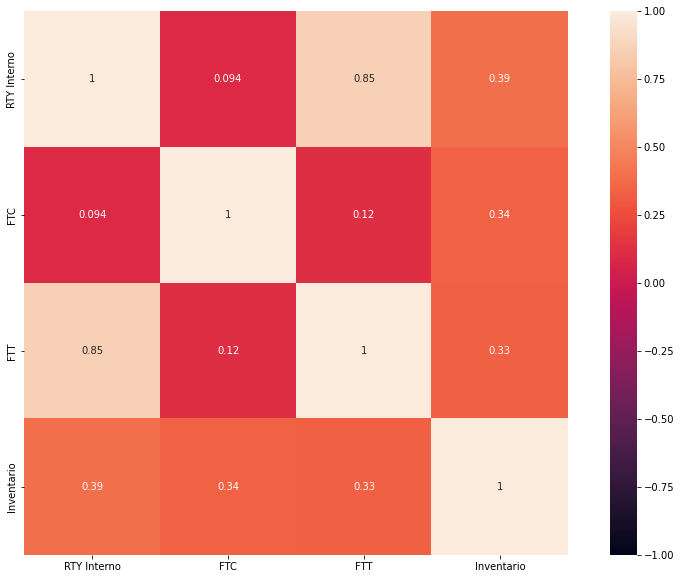

In [15]:
correlacion = df.corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)

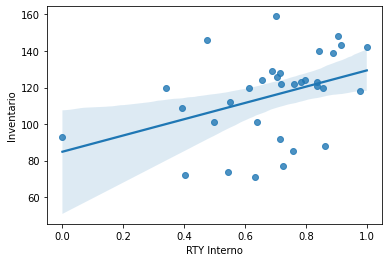

In [18]:
sns.regplot(x="RTY Interno", y="Inventario", data=df)

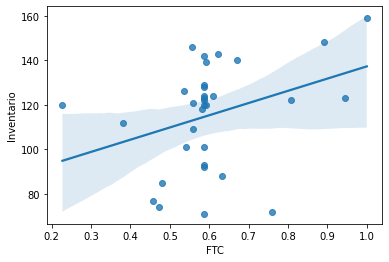

In [19]:
sns.regplot(x="FTC", y="Inventario", data=df)

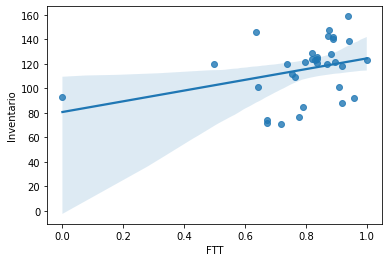

In [20]:
sns.regplot(x="FTT", y="Inventario", data=df)